# **Early Disease Prediction**

Section A1 - Team 1

Rebecca Bubis, Sanjal Desai, Yashna Meher, Mishil Trivedi


# Introduction

 1. Why does this matter?

- The increasing prevalence of chronic diseases such as obesity, diabetes, and cardiovascular conditions has created a public health challenge. Left undiagnosed until lates stages leads to higher treatment costs and patient outcomes.Our goal is to leverage machine learning techniques to identify early warning signs in patient data, helping healthcare professionals intervene sooner.


 2. What do we aim do to?

* Cluster based on symptoms


3. What do we want to find out?
* goal: early disease detection/prediction
  - We want to analyze symptom-based medical records by identifying patient clusters that exhibit early-stage disease patterns.






# Data Description

The **National Health and Nutrition Examination Survey (NHANES)** offers comprehensive datasets spanning various health-related domains, including **demographics, dietary habits, questionnaires, laboratory results, and physical examinations**. Each dataset plays a crucial role in health research and population analysis.  

For this project, we created a **consolidated dataset** by integrating multiple NHANES files. The data underwent a **cleaning process**, which involved feature selection and removal of irrelevant or inconsistent attributes. The final dataset comprises **11,933 rows and 220 columns**, incorporating data from the following sources:  

The **Demographic Data** contains essential participant information such as age, gender, race, income, education, and survey weights. This dataset is crucial for adjusting analyses to reflect population estimates. You can explore its variables in the [Demographics Variable Dictionary](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics).  

The **Dietary Data** provides insights into food and nutrient intake, dietary habits, and overall nutrition levels. It helps researchers analyze dietary patterns and their impact on health outcomes. The variables for dietary data can be found in the [Dietary Variable Dictionary](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Dietary).  

The **Questionnaire Data** includes a broad range of self-reported information, such as health behaviors, medical history, socioeconomic factors, and mental health status. This dataset is valuable for understanding lifestyle factors and their relationship to health conditions. The full list of variables is available in the [Questionnaire Variable Dictionary](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire).  

The **Laboratory Data** consists of biomarker measurements from blood and urine samples, including cholesterol levels, glucose levels, and other key health indicators. This dataset is essential for clinical research and biomarker-based health assessments. You can access the laboratory variable details in the [Laboratory Variable Dictionary](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory).  

Lastly, the **Examination Data** includes results from physical examinations performed by trained health professionals. This dataset covers measurements such as blood pressure, body composition, vision tests, and dental health assessments, making it a key component for studying physical health trends. The variable dictionary for examination data can be found [Examination Variable Dictionary](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination).  


# Analysis Plan

1. Dimensionality Reduction

  1.1 Principal Component Analysis (PCA)

  - PCA was tested to reduce dimensionality while preserving maximum variance.
Retained 90% of the variance, reducing from 85 attributes to a smaller subset.
Outlier removal was performed using reconstruction errors from PCA.

  1.2 CUR Matrix Decomposition (Alternate Approach)

  - CUR was considered as an alternative since it selects actual columns (rather than transforming features into abstract components).
Beneficial for interpretability in medical data.

2. Clustering Analysis

  2.1 KMeans Clustering

 - Used Elbow Method to determine optimal clusters (k=5).
Clustering was performed on the top 5 principal components post-dimension reduction.

  5.2 Cluster Interpretation
Top 5 principal components were analyzed based on attribute loadings.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('/content/cleaned_data.csv')

In [ ]:
df.head()

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,...,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
0,130378.0,R,4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,...,1.57,1.0,57.3,0.0,2.47,0.0,71.0,190.0,200.0,1.0
1,130379.0,R,4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,...,1.57,1.0,58.9,0.0,3.40,0.0,70.0,220.0,220.0,2.0
2,130380.0,R,4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,...,1.57,1.0,37.8,0.0,1.52,0.0,60.0,150.0,165.0,1.0
3,130386.0,R,4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,...,1.57,1.0,95.3,0.0,5.53,0.0,68.0,200.0,180.0,2.0
4,130387.0,R,4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,...,1.57,1.0,25.1,0.0,1.10,0.0,67.0,215.0,215.0,2.0


In [ ]:
cols_to_drop = [col for col in df.columns if '_x' in col or '_y' in col]
df = df.drop(columns=cols_to_drop)

# EDA

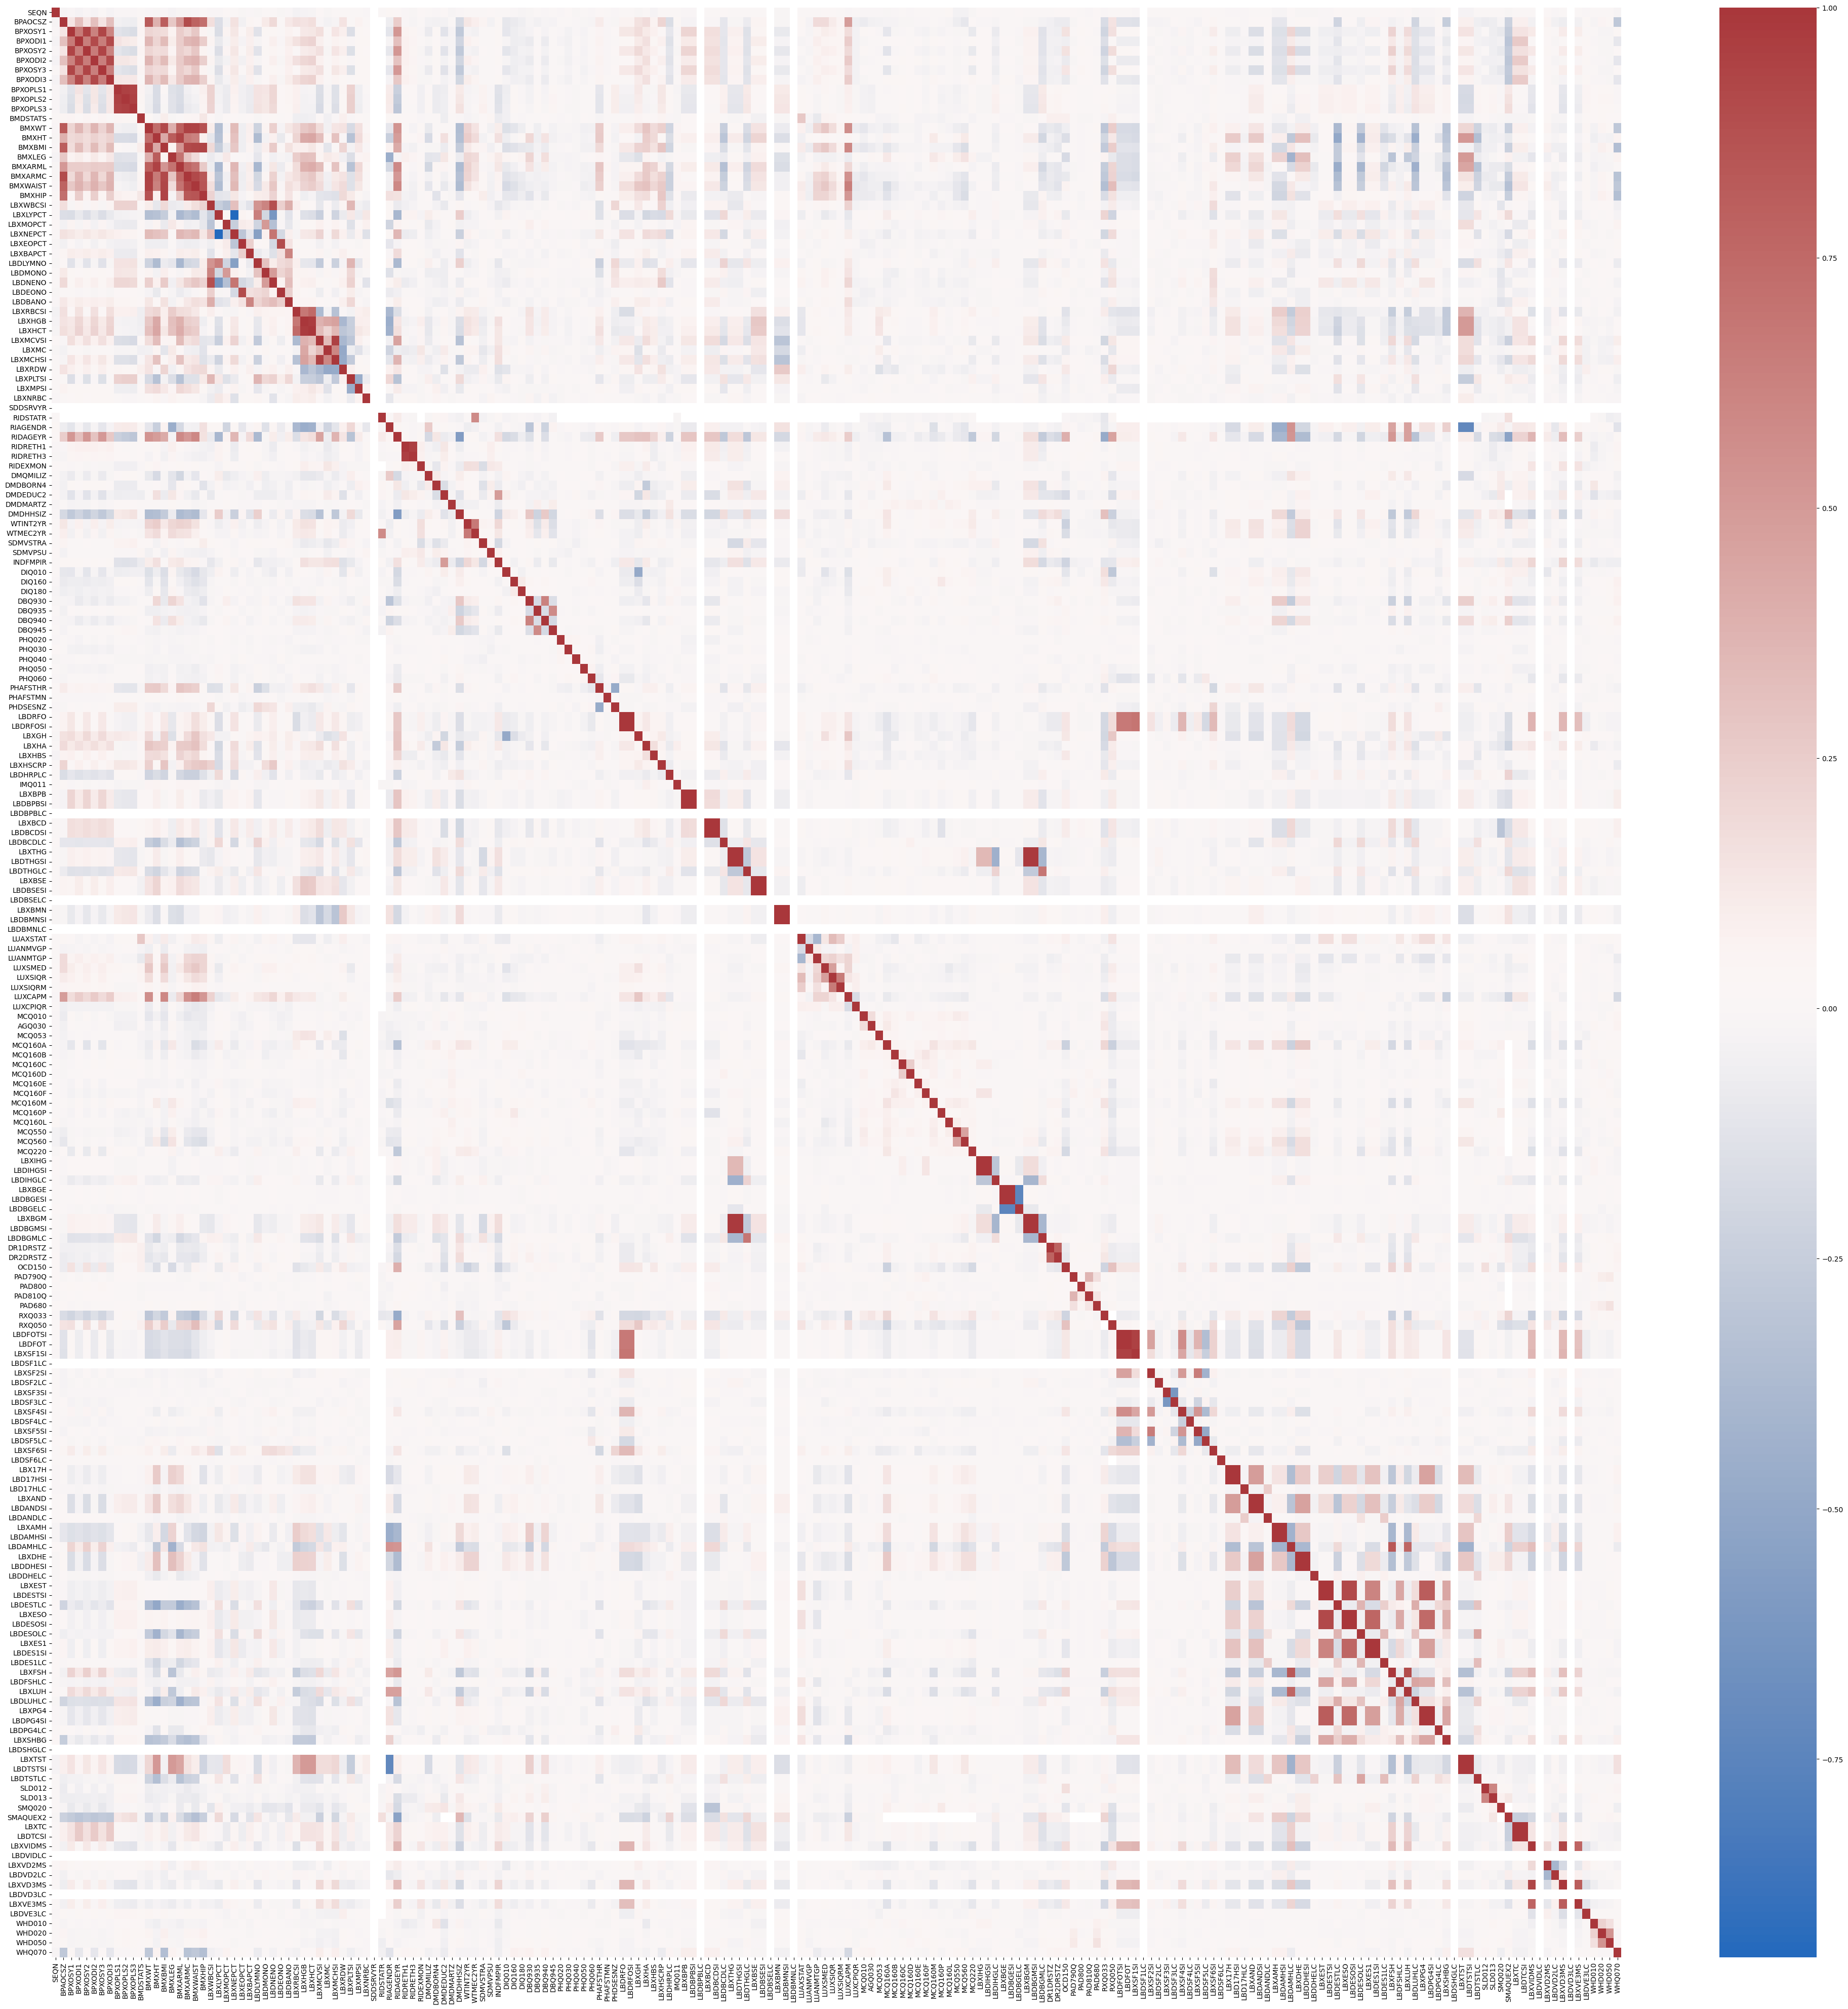

In [ ]:
corr = df.corr( numeric_only=True)
plt.figure(figsize=(50, 50))
sns.heatmap(corr, annot=False, cmap="vlag")
plt.show()


In [ ]:
df.describe()

,SEQN,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,...,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
count,11933.000000,7611.000000,7517.000000,7517.000000,7505.000000,7505.000000,7480.000000,7480.000000,7517.000000,7505.000000,...,7307.000000,7307.000000,7308.000000,7308.0,7238.000000,7238.000000,8486.000000,8486.000000,8486.000000,8486.000000
mean,136344.000000,3.523190,119.288546,72.748038,119.079680,72.089807,118.917647,71.805882,72.338167,73.087009,...,4.272359,0.801971,73.103339,0.0,4.877314,0.009671,150.146712,317.142588,420.465237,1.548786
std,3444.904716,0.671227,18.561052,11.895572,18.571271,11.848420,18.495220,11.767402,12.715175,12.775995,...,13.545845,0.398542,36.067917,0.0,3.820629,0.097872,906.045672,1120.476550,1491.928102,0.520562
min,130378.000000,2.000000,61.000000,33.000000,59.000000,32.000000,50.000000,24.000000,35.000000,32.000000,...,1.570000,0.000000,4.100000,0.0,0.540000,0.000000,40.000000,63.000000,67.000000,1.000000
25%,133361.000000,3.000000,106.000000,64.000000,106.000000,64.000000,106.000000,64.000000,63.000000,64.000000,...,1.570000,1.000000,48.400000,0.0,2.440000,0.000000,63.000000,145.000000,145.000000,1.000000
50%,136344.000000,4.000000,117.000000,72.000000,116.000000,71.000000,116.000000,71.000000,71.000000,72.000000,...,1.570000,1.000000,68.100000,0.0,3.850000,0.000000,66.000000,174.000000,175.000000,2.000000
75%,139327.000000,4.000000,130.000000,80.000000,129.000000,79.000000,129.000000,79.000000,80.000000,81.000000,...,1.570000,1.000000,91.525000,0.0,6.097500,0.000000,70.000000,207.000000,214.000000,2.000000
max,142310.000000,5.000000,232.000000,142.000000,233.000000,139.000000,232.000000,136.000000,158.000000,141.000000,...,239.000000,1.000000,422.000000,0.0,62.800000,1.000000,9999.000000,9999.000000,9999.000000,9.000000


Due to the size of our dataset, our ability to conduct EDA is limited. Even with the descriptive statistics provided above, it’s challenging to identify any clear relationships or patterns within the data. When examining the heatmap, it becomes apparent that there aren’t many strong correlations between the attributes. However, there are indications of relatively strong correlations in the upper-left and bottom-right corners. Given the lack of significant linearity suggested by the heatmap, Principal Component Analysis may not be the most suitable approach. Nevertheless, we will continue to explore this method while also investigating other nonlinear techniques.

# Data Preprocessing

## Remove Null Values

In [ ]:
# check for null values
df.isna().sum()

,0
SEQN,0
BPAOARM,4279
BPAOCSZ,4322
BPXOSY1,4416
BPXODI1,4416
...,...
LBDVE3LC,4695
WHD010,3447
WHD020,3447
WHD050,3447


In [ ]:
# remove null values
df = df.dropna() # don't want to replace with mean/median since each row is a person
df.isna().sum()

,0
SEQN,0
BPAOARM,0
BPAOCSZ,0
BPXOSY1,0
BPXODI1,0
...,...
LBDVE3LC,0
WHD010,0
WHD020,0
WHD050,0


## Remove Duplicates

In [ ]:
# remove duplicates
df.drop_duplicates
df.shape

(1273, 209)

## Handle Categorical Variables

In [ ]:
# check which columns are categorical
cat_df = df.select_dtypes(include=['object']).columns
cat_df

Index(['BPAOARM', 'LUAPNME', 'PAD790U', 'SLQ300', 'SLQ310', 'SLQ320',
       'SLQ330'],
      dtype='object')

In [ ]:
df_numeric = df.drop(columns=cat_df)
df_numeric.shape  # make separate numeric df, can also encode categorical variables if need to later

(1273, 202)

In [ ]:
# normalize numeric attributes
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
normalized_data = sc.fit_transform(df_numeric)
df_normalized = pd.DataFrame(normalized_data, columns=df_numeric.columns)
df_normalized.head()

,SEQN,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,...,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
0,-1.725824,0.613397,0.675412,2.030115,0.464309,1.913257,0.520300,1.794671,0.998074,0.695408,...,-0.210093,0.569791,-0.710177,0.0,-0.771534,-0.093361,-0.027927,-0.030737,-0.058870,-0.872733
1,-1.725433,0.613397,-0.110922,0.734059,-0.332428,0.057509,-0.554196,0.101108,0.148720,0.013262,...,-0.210093,0.569791,-0.665916,0.0,-0.544629,-0.093361,-0.030469,0.034267,-0.032794,0.902010
2,-1.721130,2.310905,-0.560255,0.178606,-0.958436,0.243084,-0.441091,-0.651586,2.102234,2.059699,...,-0.210093,0.569791,-0.610589,0.0,-0.529990,-0.093361,-0.045720,0.157775,12.717176,-0.872733
3,-1.720739,0.613397,-1.009589,-0.284271,-1.072256,-0.128066,-0.780405,-0.369326,2.272104,2.315503,...,-0.210093,0.569791,-0.616122,0.0,-0.581227,-0.093361,-0.033011,0.034267,0.025878,0.902010
4,-1.719957,2.310905,0.900079,1.659814,0.748858,1.449320,0.576852,1.794671,-0.530763,-0.583615,...,-0.210093,0.569791,0.080989,0.0,-0.120098,-0.093361,-0.030469,0.222780,0.097587,-0.872733


# Methods

In [ ]:
import scipy.linalg
from sklearn.utils.extmath import randomized_svd

def cur_decomposition(df, rank=20):
    A = df.select_dtypes(include=np.number).values
    m, n = A.shape
    col_norms = np.linalg.norm(A, axis=0) ** 2
    col_probs = col_norms / np.sum(col_norms)
    np.random.seed(42)
    col_indices = np.random.choice(n, size=rank, replace=False, p=col_probs)
    selected_columns = df.select_dtypes(include=np.number).columns[col_indices]

    _, S, Vt = randomized_svd(A[:, col_indices], n_components=rank)
    U = np.linalg.pinv(S[:, None] * Vt)
    return selected_columns

selected_columns = cur_decomposition(df, rank=20)
print(selected_columns)

Index(['SEQN', 'WTMEC2YR', 'WTINT2YR', 'LBDES1SI', 'LBDRFOSI', 'LBXES1',
       'LBXAND', 'PAD810Q', 'WHD020', 'WHD050', 'LBXPLTSI', 'PAD680', 'PAD800',
       'SDMVSTRA', 'BPXOPLS1', 'LBXTC', 'LBDRFO', 'LBDESOSI', 'LBXFSH',
       'RIDAGEYR'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df_selected = df[['WTMEC2YR', 'WTINT2YR', 'LBDES1SI', 'LBDRFOSI', 'LBXES1',
                  'LBXAND', 'PAD810Q', 'WHD020', 'WHD050', 'LBXPLTSI', 'PAD680', 'PAD800',
                  'SDMVSTRA', 'BPXOPLS1', 'LBXTC', 'LBDRFO', 'LBDESOSI', 'LBXFSH',
                  'RIDAGEYR']]  # Excluding SEQN

df_selected.fillna(df_selected.mean(), inplace=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

<ipython-input-14-f649a216972d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(df_selected.mean(), inplace=True)


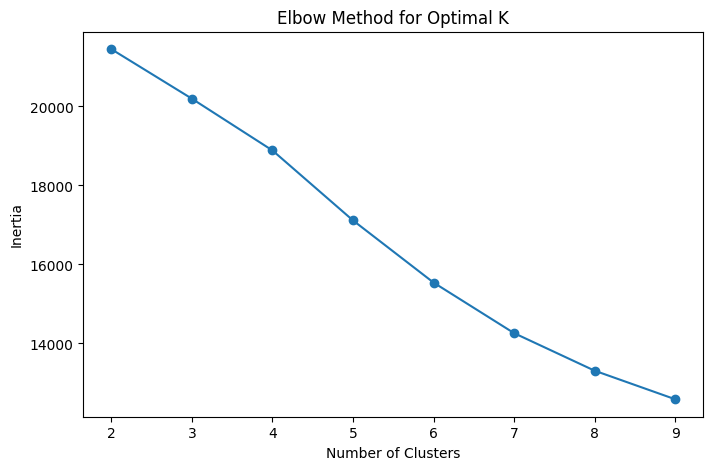

<ipython-input-15-73d6be814fc3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans.fit_predict(df_scaled)


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(df_scaled)


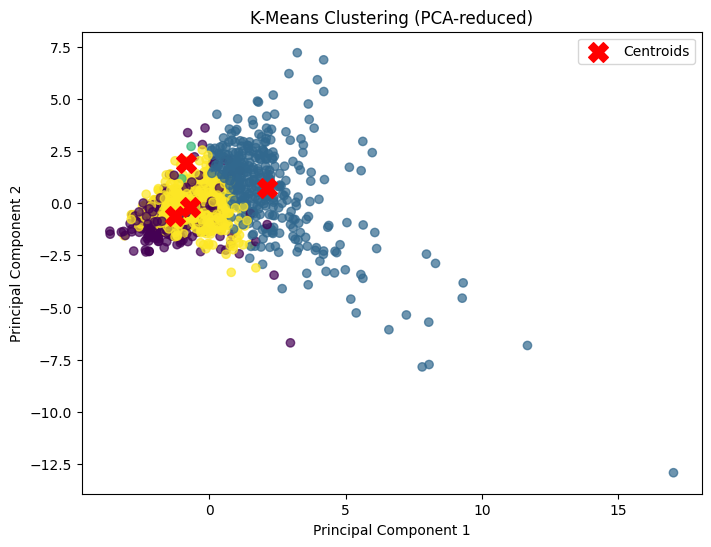

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_selected['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (PCA-reduced)')
plt.legend()
plt.show()


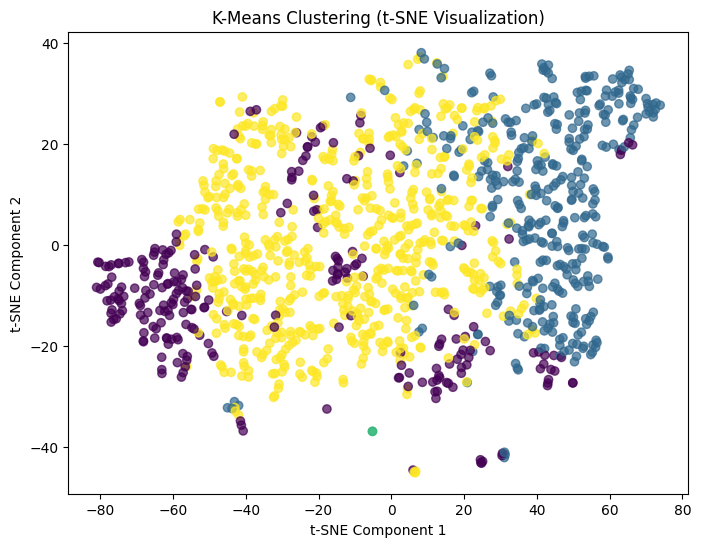

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=15)
df_tsne = tsne.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_selected['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering (t-SNE Visualization)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

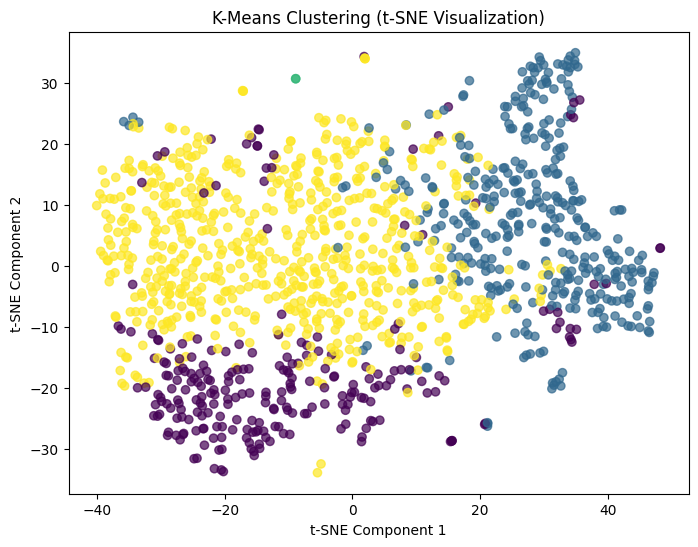

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_selected['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering (t-SNE Visualization)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

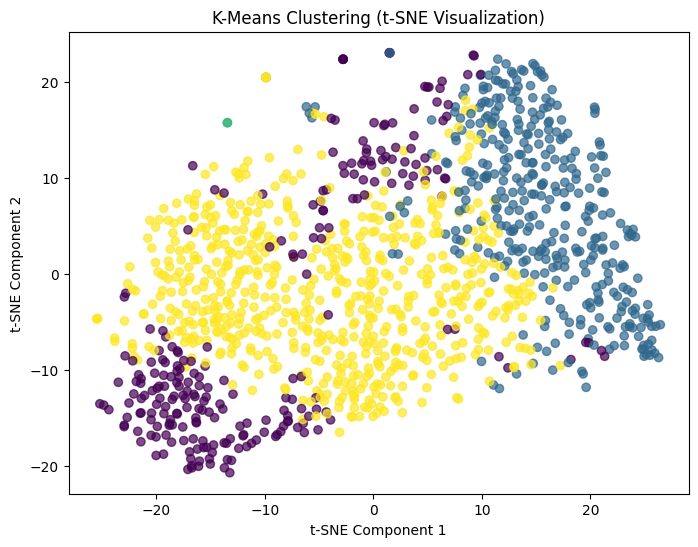

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=60)
df_tsne = tsne.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_selected['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering (t-SNE Visualization)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

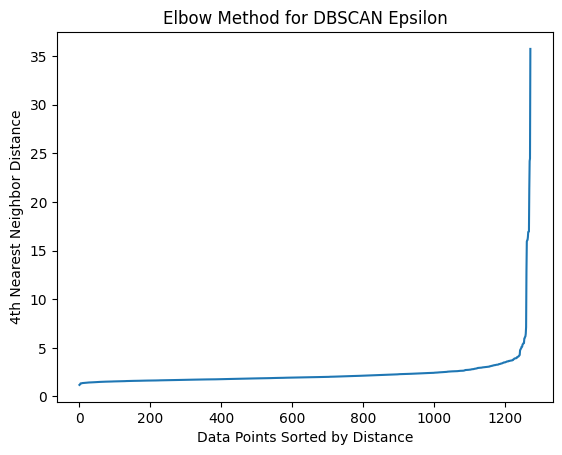

<ipython-input-32-49a6f53f783a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("Elbow Method for DBSCAN Epsilon")
plt.show()

# Apply DBSCAN with found parameters
dbscan = DBSCAN(eps=1.5, min_samples=10)
df_selected['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)



Best Linkage Method: complete
Best Number of Clusters: 3
Best Silhouette Score: 0.7964


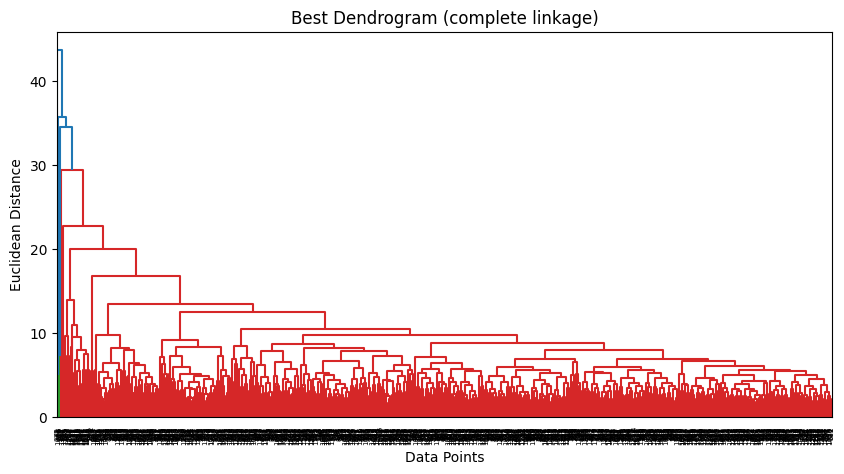

<ipython-input-50-3acb2815359a>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Best_Hierarchical_Cluster_2'] = best_clusters


In [ ]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def optimal_hierarchical_clustering(df_scaled, max_clusters=10, plot_dendrogram=True):
    linkage_methods = ['ward', 'complete', 'average', 'single']
    best_score = -1
    best_linkage_2 = None
    best_num_clusters = None
    best_cluster_labels = None

    # Try different linkage methods and cluster numbers
    for linkage_method in linkage_methods:
        for num_clusters in range(3, max_clusters + 1):  # Avoid single cluster case
            try:
                hc = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage_method)
                cluster_labels = hc.fit_predict(df_scaled)

                # Compute silhouette score (higher is better)
                score = silhouette_score(df_scaled, cluster_labels)

                if score > best_score:
                    best_score = score
                    best_linkage = linkage_method
                    best_num_clusters = num_clusters
                    best_cluster_labels = cluster_labels
            except Exception as e:
                # Some linkage methods may fail on certain datasets (e.g., 'single' with noisy data)
                print(f"Skipping {linkage_method} with {num_clusters} clusters due to error: {e}")

    print(f"\nBest Linkage Method: {best_linkage}")
    print(f"Best Number of Clusters: {best_num_clusters}")
    print(f"Best Silhouette Score: {best_score:.4f}")

    # Plot Dendrogram for best method
    if plot_dendrogram:
        plt.figure(figsize=(10, 5))
        sch.dendrogram(sch.linkage(df_scaled, method=best_linkage))
        plt.title(f'Best Dendrogram ({best_linkage} linkage)')
        plt.xlabel('Data Points')
        plt.ylabel('Euclidean Distance')
        plt.show()

    return best_linkage_2, best_num_clusters, best_cluster_labels

# Run the function to determine the best clustering method
best_linkage_2, best_num_clusters, best_clusters = optimal_hierarchical_clustering(df_scaled, max_clusters=10)

# Store the best clusters in the dataframe
df_selected['Best_Hierarchical_Cluster_2'] = best_clusters


Best Linkage Method: complete
Best Number of Clusters: 2
Best Silhouette Score: 0.8536


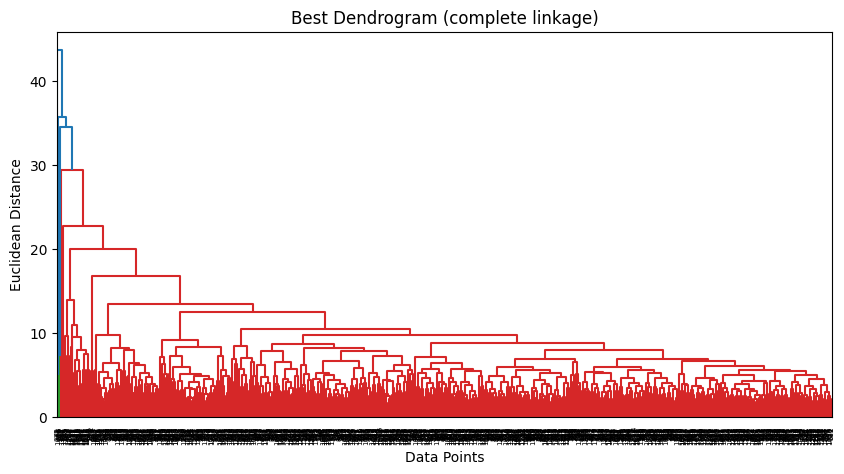

<ipython-input-51-516c30fe2daf>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Best_Hierarchical_Cluster'] = best_clusters


In [ ]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def optimal_hierarchical_clustering(df_scaled, max_clusters=10, plot_dendrogram=True):
    linkage_methods = ['ward', 'complete', 'average', 'single']
    best_score = -1
    best_linkage = None
    best_num_clusters = None
    best_cluster_labels = None

    # Try different linkage methods and cluster numbers
    for linkage_method in linkage_methods:
        for num_clusters in range(2, max_clusters + 1):  # Avoid single cluster case
            try:
                hc = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage_method)
                cluster_labels = hc.fit_predict(df_scaled)

                # Compute silhouette score (higher is better)
                score = silhouette_score(df_scaled, cluster_labels)

                if score > best_score:
                    best_score = score
                    best_linkage = linkage_method
                    best_num_clusters = num_clusters
                    best_cluster_labels = cluster_labels
            except Exception as e:
                # Some linkage methods may fail on certain datasets (e.g., 'single' with noisy data)
                print(f"Skipping {linkage_method} with {num_clusters} clusters due to error: {e}")

    print(f"\nBest Linkage Method: {best_linkage}")
    print(f"Best Number of Clusters: {best_num_clusters}")
    print(f"Best Silhouette Score: {best_score:.4f}")

    # Plot Dendrogram for best method
    if plot_dendrogram:
        plt.figure(figsize=(10, 5))
        sch.dendrogram(sch.linkage(df_scaled, method=best_linkage))
        plt.title(f'Best Dendrogram ({best_linkage} linkage)')
        plt.xlabel('Data Points')
        plt.ylabel('Euclidean Distance')
        plt.show()

    return best_linkage, best_num_clusters, best_cluster_labels

# Run the function to determine the best clustering method
best_linkage, best_num_clusters, best_clusters = optimal_hierarchical_clustering(df_scaled, max_clusters=10)

# Store the best clusters in the dataframe
df_selected['Best_Hierarchical_Cluster'] = best_clusters

In [ ]:
import plotly.express as px
import pandas as pd

# Convert data into a DataFrame for Plotly
df_plot = pd.DataFrame(df_scaled[:, :3], columns=['Feature 1', 'Feature 2', 'Feature 3'])
df_plot['Cluster'] = best_clusters  # Assign clusters

fig = px.scatter_3d(df_plot, x='Feature 1', y='Feature 2', z='Feature 3',
                     color=df_plot['Cluster'].astype(str),
                     title=f'3D Interactive Hierarchical Clustering ({best_linkage} linkage)',
                     opacity=0.8)

fig.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate clustering performance (higher silhouette score is better)
kmeans_silhouette = silhouette_score(df_scaled, df_selected['Cluster'])
dbscan_silhouette = silhouette_score(df_scaled, df_selected['DBSCAN_Cluster']) if len(set(df_selected['DBSCAN_Cluster'])) > 1 else -1
hierarchical_silhouette = silhouette_score(df_scaled, df_selected['Best_Hierarchical_Cluster'])

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")


K-Means Silhouette Score: 0.13738807698616964
DBSCAN Silhouette Score: -0.19340819878866172
Hierarchical Clustering Silhouette Score: 0.8536430788563253


Identify more factors that affect stroke and heart disease more